# Data Science Project: TBD

**Author**: Samer Eladad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import Label, messagebox
from PIL import Image, ImageTk

In [2]:
# Clean combined movies dataset
movies_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/updated_clean_combined_movies.csv'
movies_clean_df = pd.read_csv(movies_clean_path)

# Clean combined series dataset
series_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_series.csv'
series_clean_df = pd.read_csv(series_clean_path)

# Separate movie DataFrames by platform and content type
netflix_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Netflix']
prime_video_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Prime Video']
disney_plus_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Disney+']

# Separate series DataFrames by platform and content type
netflix_series_df = series_clean_df[series_clean_df['platform'] == 'Netflix']
prime_video_series_df = series_clean_df[series_clean_df['platform'] == 'Prime Video']
disney_plus_series_df = series_clean_df[series_clean_df['platform'] == 'Disney+']

In [3]:
# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_clean_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


In [4]:
# Display Clean Series dataset column names
print("\nClean Combined Series dataset column names:")
print(series_clean_df.columns.tolist())


Clean Combined Series dataset column names:
['title', 'country', 'release_year', 'rating', 'duration_seasons', 'genre', 'description', 'platform']


In [5]:
# Explode the movie 'genre' column for each platform
netflix_movies_df = netflix_movies_df.assign(genre=netflix_movies_df['genre'].str.split(', ')).explode('genre')
prime_video_movies_df = prime_video_movies_df.assign(genre=prime_video_movies_df['genre'].str.split(', ')).explode('genre')
disney_plus_movies_df = disney_plus_movies_df.assign(genre=disney_plus_movies_df['genre'].str.split(', ')).explode('genre')

# Explode the series 'genre' column for each platform
netflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')
prime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')
disney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_movies_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_movies_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_movies_df['genre'].value_counts()

# Count the number of series by genre
netflix_series_genre_counts = netflix_series_df['genre'].value_counts()
prime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()
disney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()

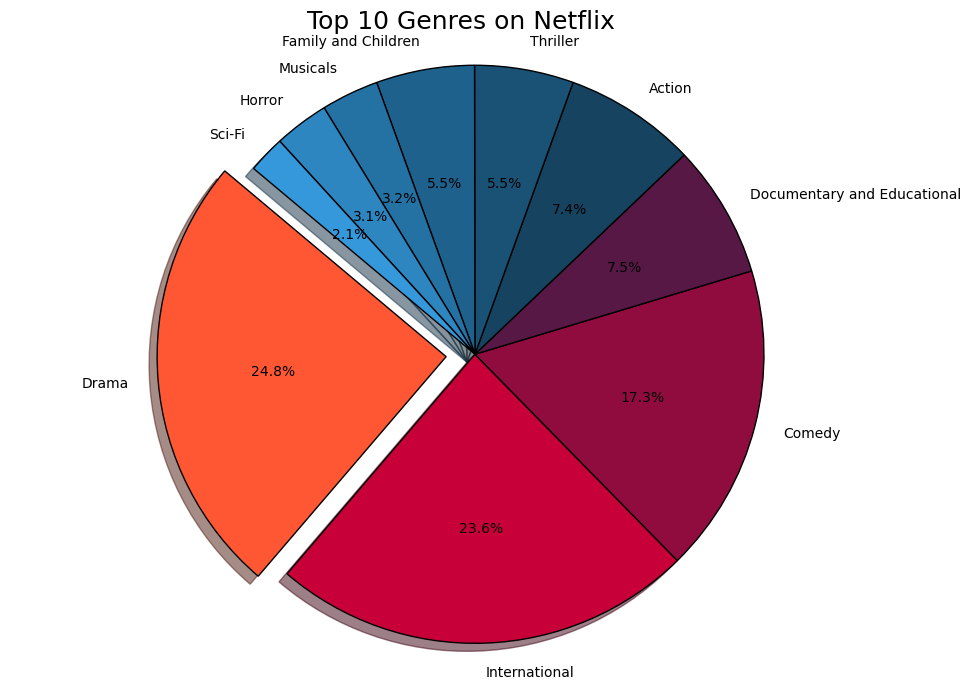

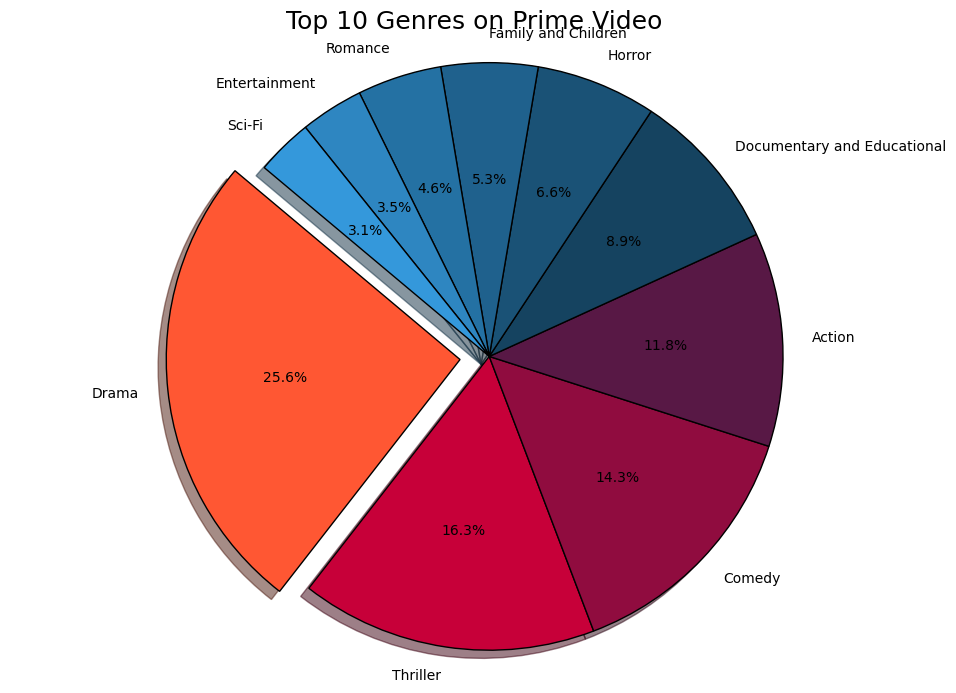

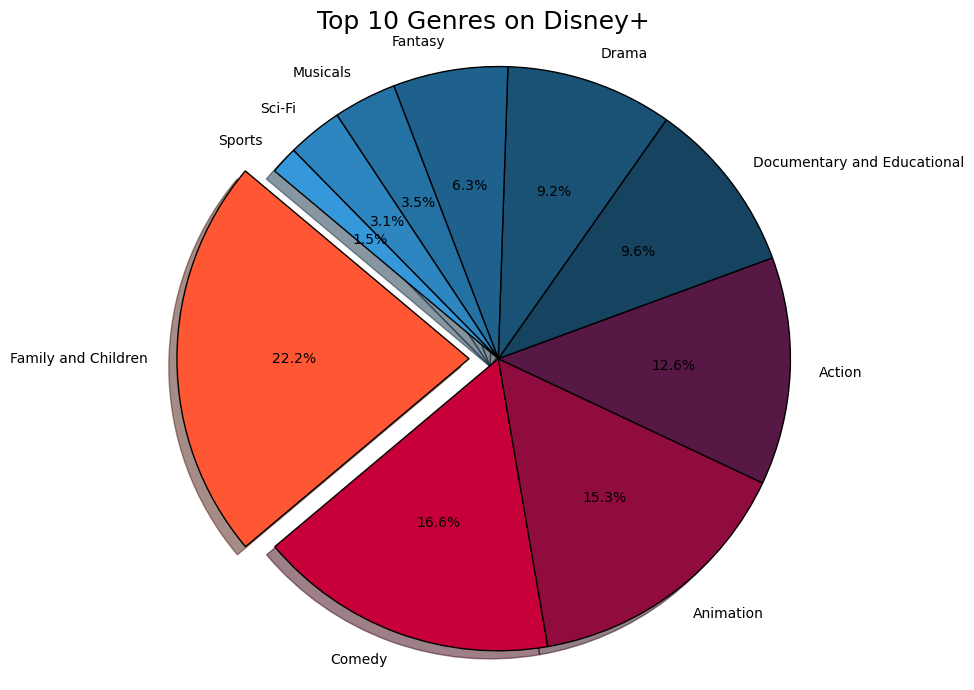

In [6]:
def plot_top_10_genres_movie_count_pie(genre_counts, platform_name):
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)

    # Modern, contrasted color palette
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#154360', '#1A5276', '#1F618D', '#2471A3', '#2E86C1', '#3498DB']

    # Calculate explode data to separate the largest segment
    explode = [0.1 if i == top_10_genres.idxmax() else 0 for i in top_10_genres.index]

    plt.figure(figsize=(10, 7))
    plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Top 10 Genres on {platform_name}', fontsize=18)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Improve the display
    plt.tight_layout()
    plt.show()

# Generate enhanced pie charts for each platform
plot_top_10_genres_movie_count_pie(netflix_movies_genre_counts, 'Netflix')
plot_top_10_genres_movie_count_pie(prime_video_movies_genre_counts, 'Prime Video')
plot_top_10_genres_movie_count_pie(disney_plus_movies_genre_counts, 'Disney+')

## Average movie duration per Genre for each platform

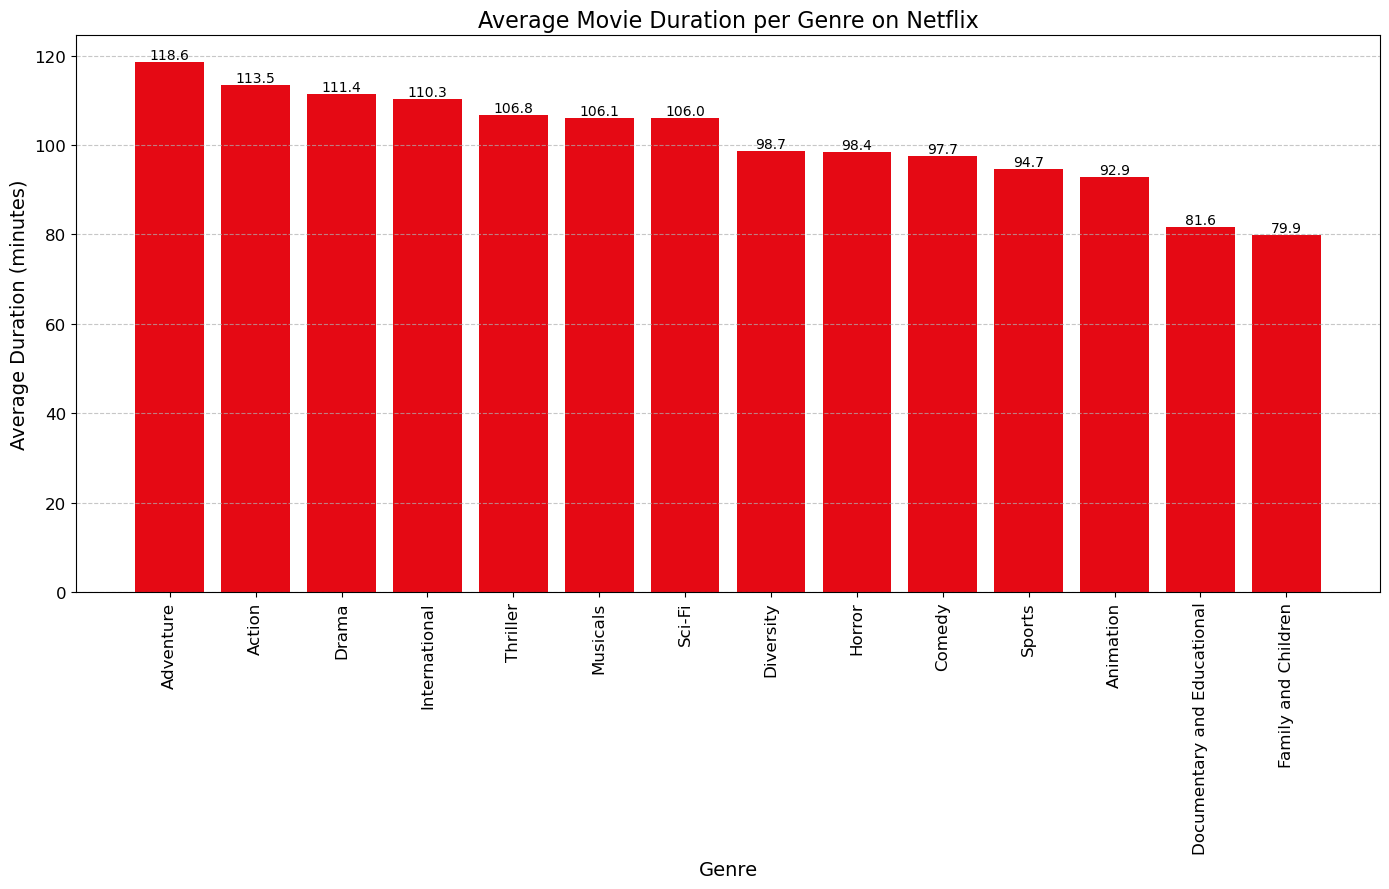

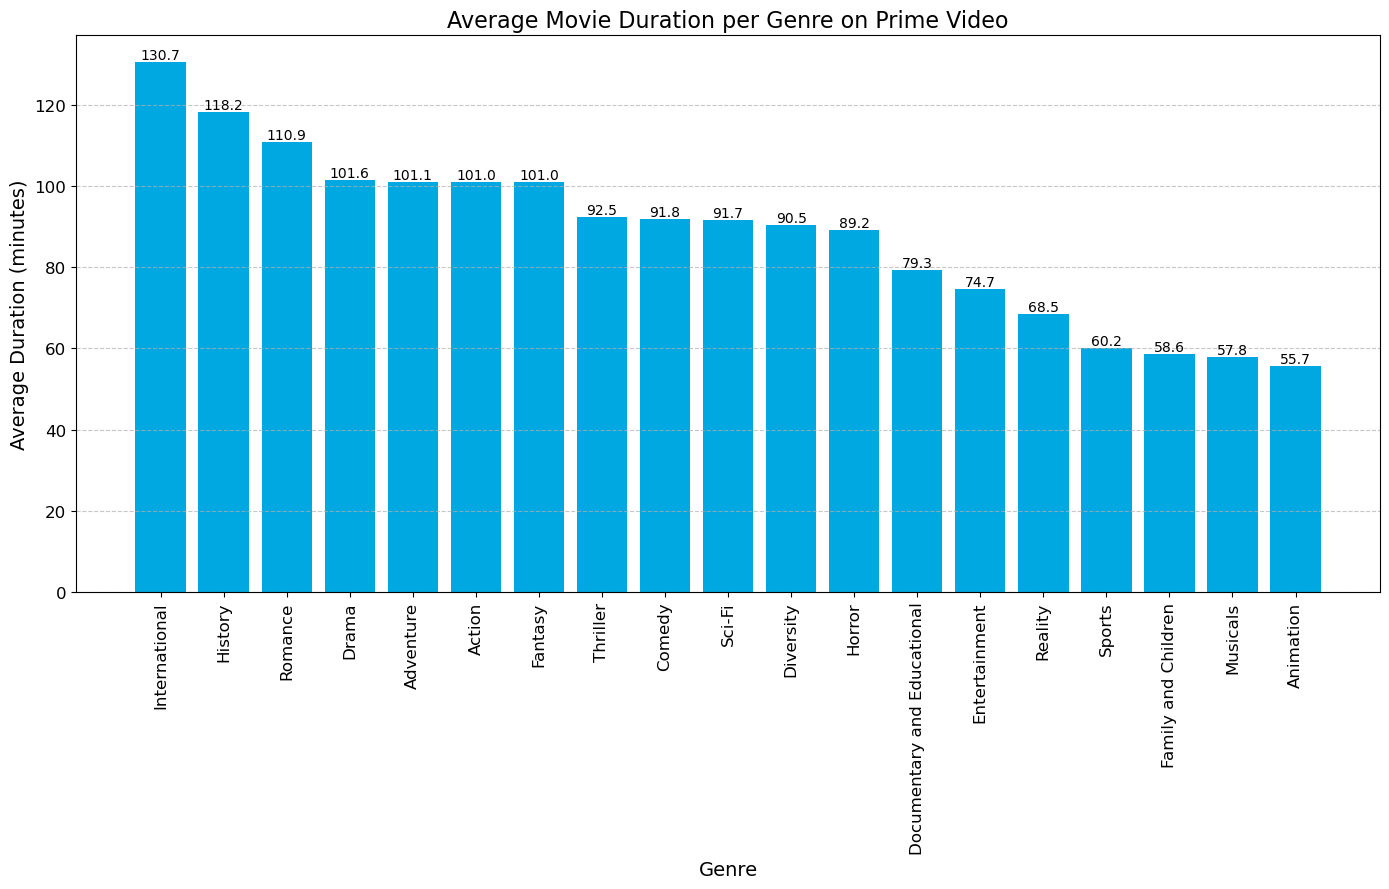

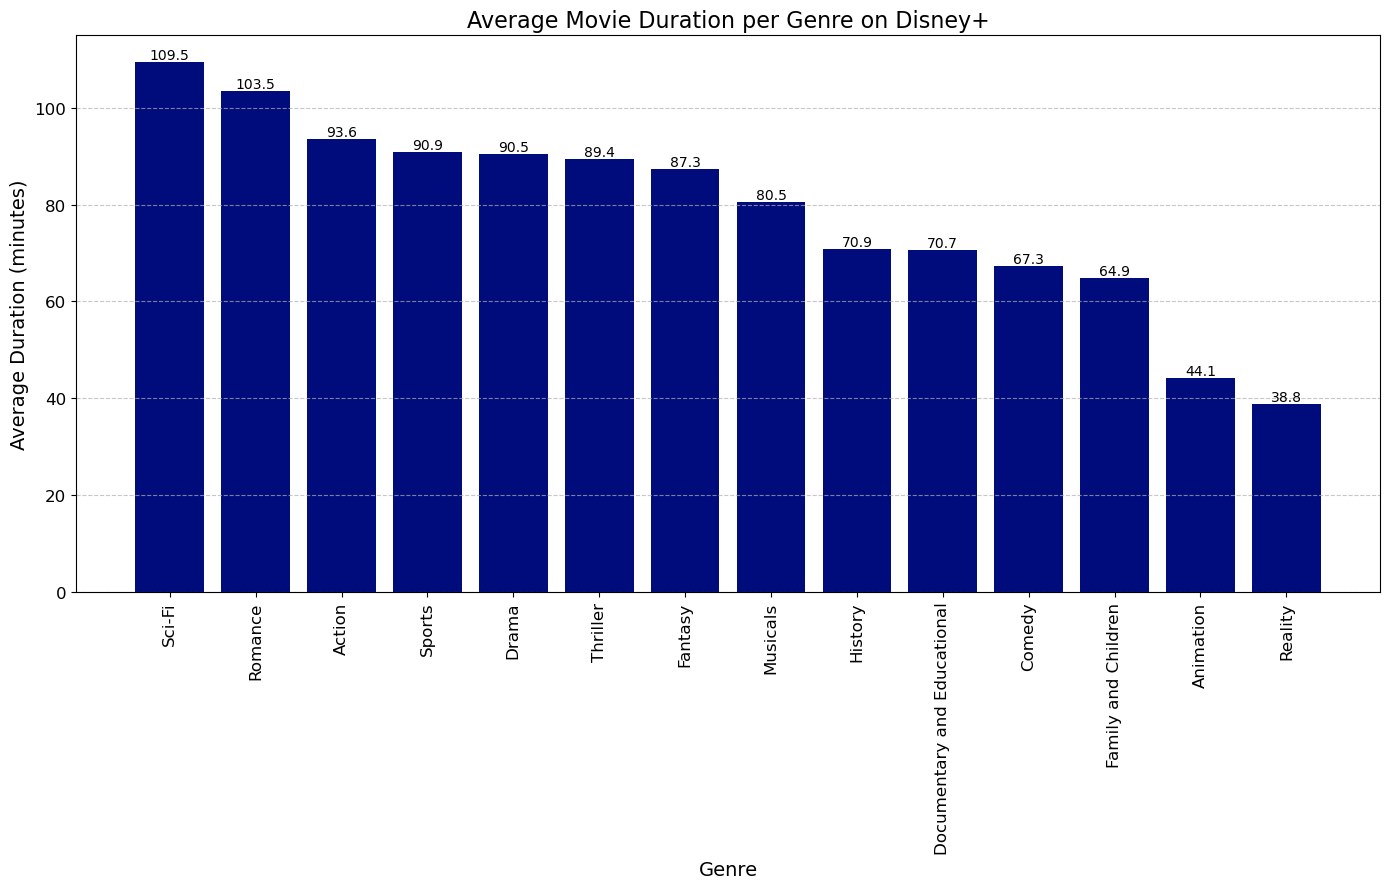

In [7]:
def plot_average_movie_duration_per_genre(df, platform_name, color):
    # Group by 'genre' and calculate average duration
    avg_duration = df.groupby('genre')['duration_min'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(14, 9))
    bars = plt.bar(avg_duration.index, avg_duration.values, color=color)
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='bottom', ha='center', fontsize=10)
    
    plt.title(f'Average Movie Duration per Genre on {platform_name}', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Average Duration (minutes)', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Colors for each platform
netflix_color = '#E50914'
prime_video_color = '#00A8E1'
disney_plus_color = '#000c7c'

# Plot for each platform
plot_average_movie_duration_per_genre(netflix_movies_df, 'Netflix', netflix_color)
plot_average_movie_duration_per_genre(prime_video_movies_df, 'Prime Video', prime_video_color)
plot_average_movie_duration_per_genre(disney_plus_movies_df, 'Disney+', disney_plus_color)


## Movie duration per Genre for each platform

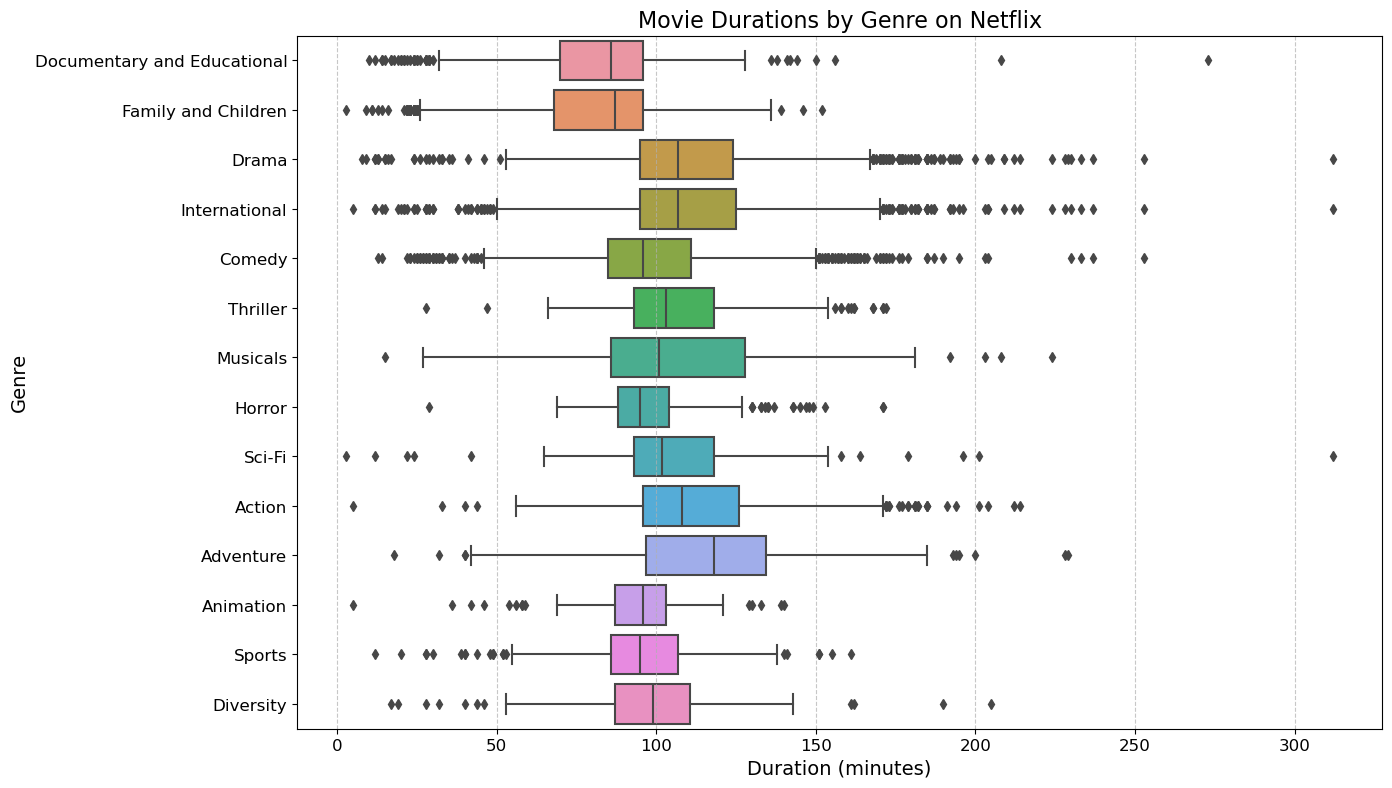

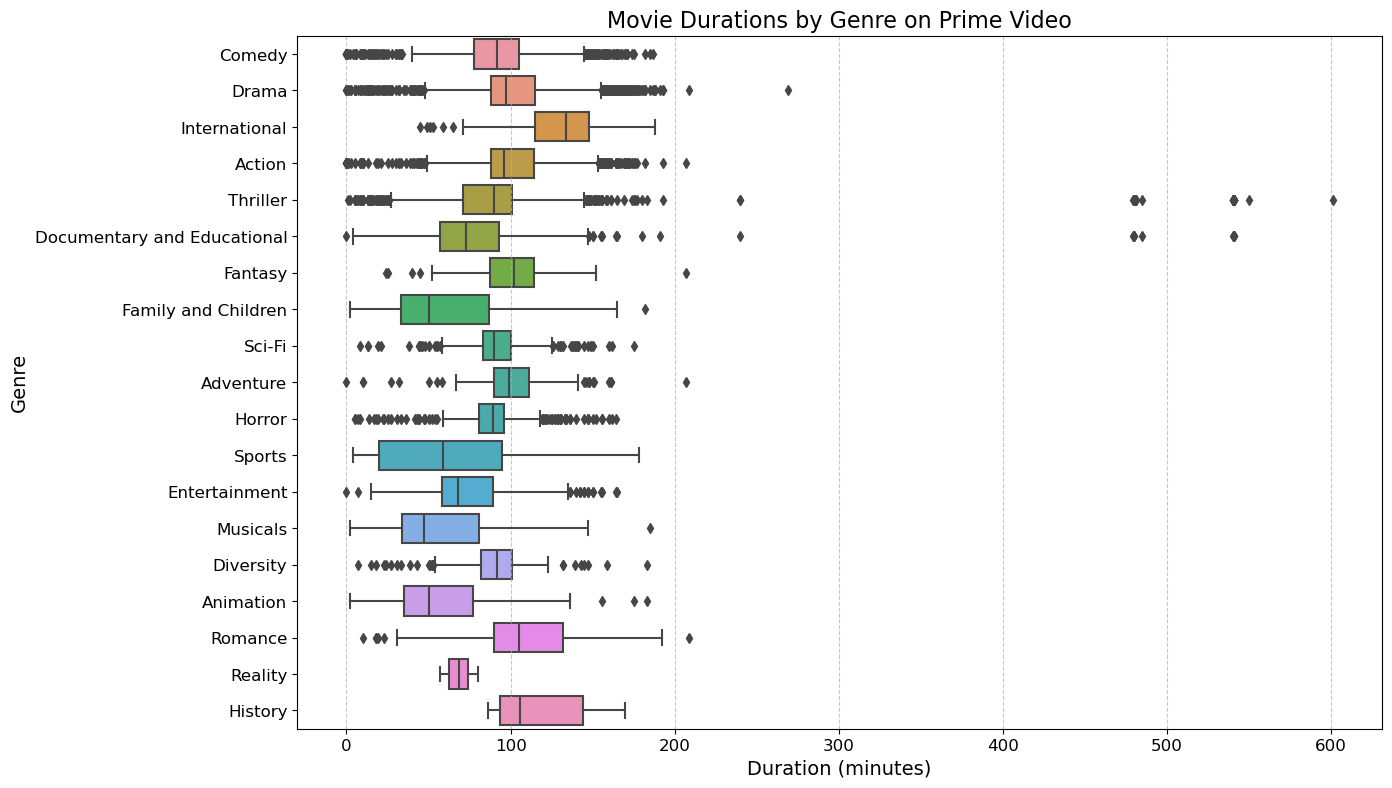

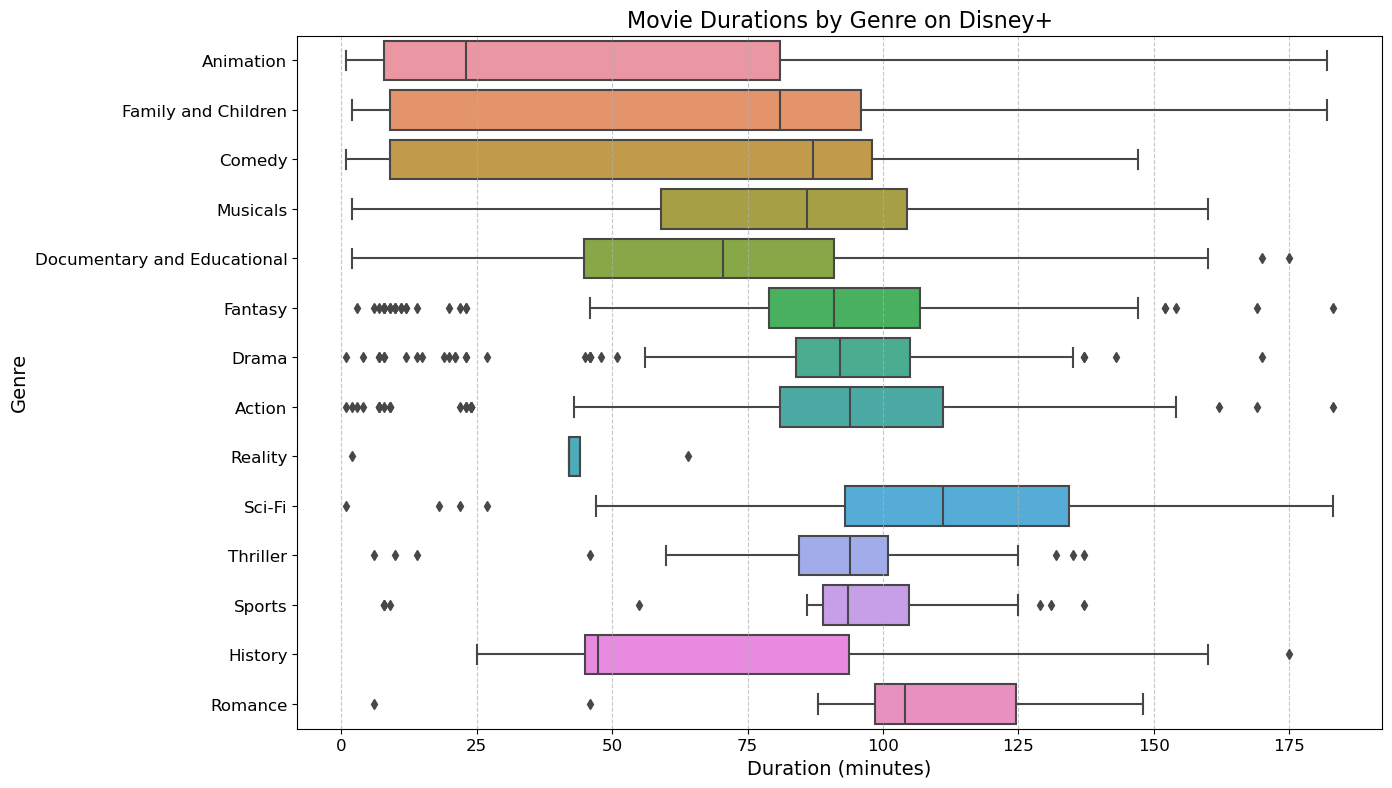

In [8]:
def create_box_plot_for_platform(df, platform_name):
    plt.figure(figsize=(14, 9))
    sns.boxplot(data=df, y='genre', x='duration_min')
    plt.title(f'Movie Durations by Genre on {platform_name}', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=14)
    plt.ylabel('Genre', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

create_box_plot_for_platform(netflix_movies_df, 'Netflix')
create_box_plot_for_platform(prime_video_movies_df, 'Prime Video')
create_box_plot_for_platform(disney_plus_movies_df, 'Disney+')


## Duration vs revenue

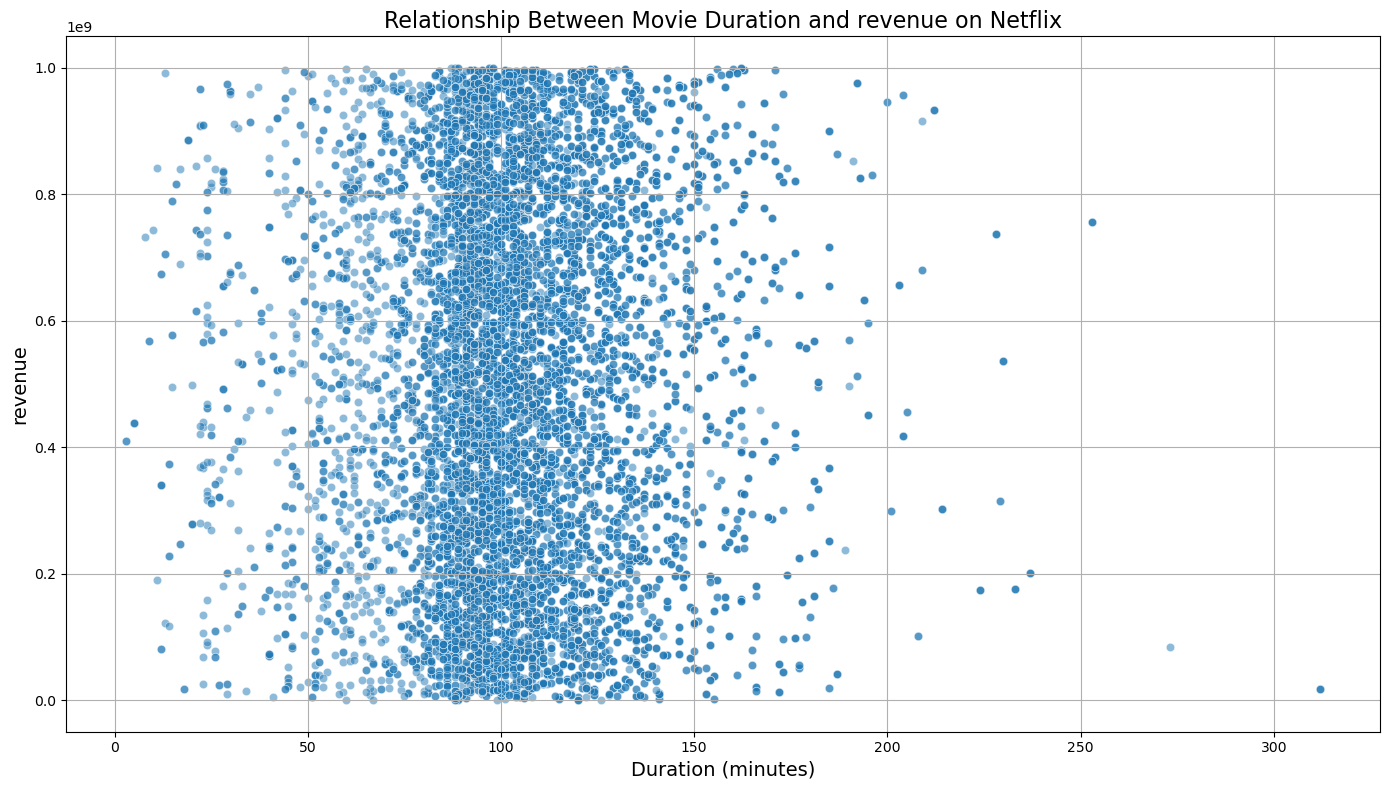

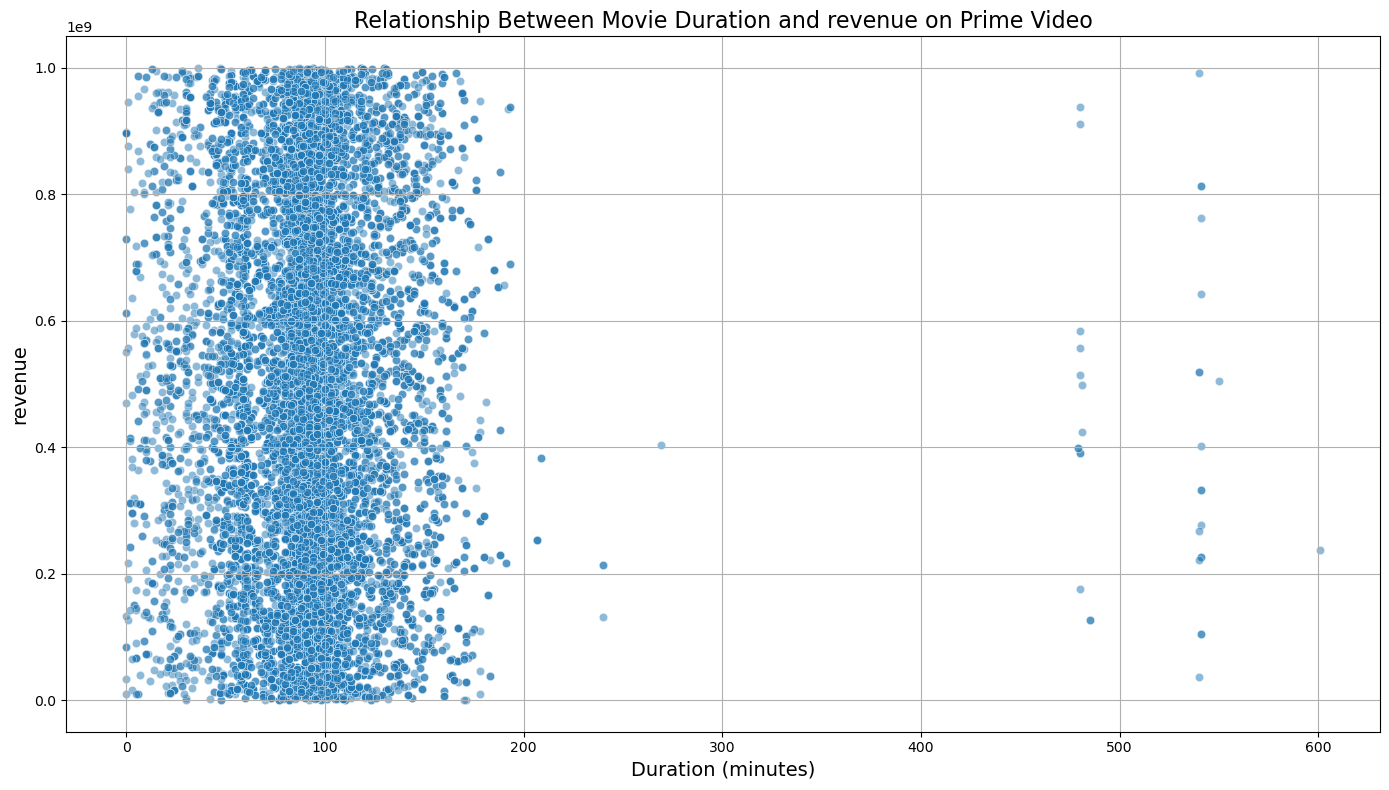

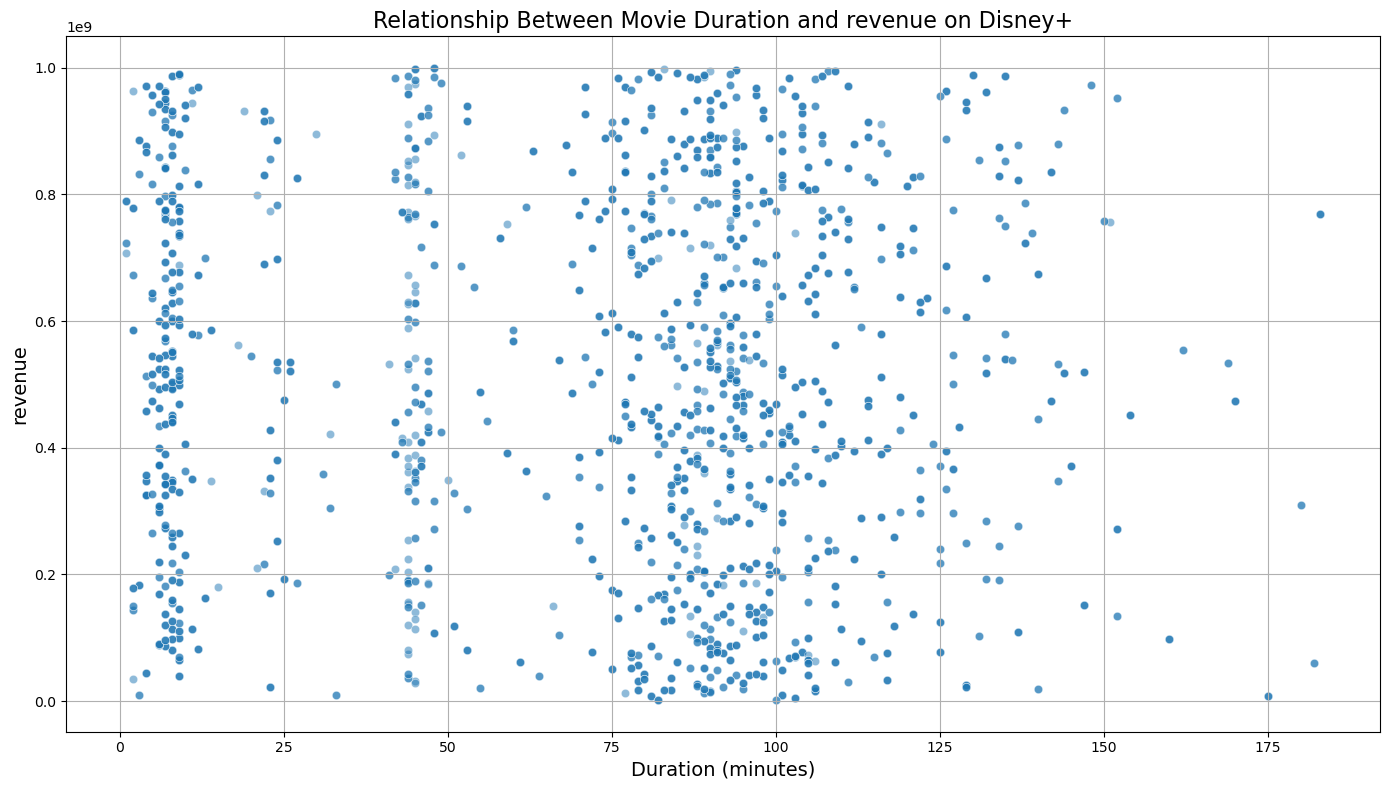

In [9]:
# Function to create a scatter plot showing the relationship between movie duration and revenue for a specific platform
def plot_duration_vs_revenue_for_platform(df, platform_name):
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df, x='duration_min', y='revenue', alpha=0.5)
    plt.title(f'Relationship Between Movie Duration and revenue on {platform_name}', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=14)
    plt.ylabel('revenue', fontsize=14)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
    plt.show()

# Create plots for each platform
plot_duration_vs_revenue_for_platform(netflix_movies_df, 'Netflix')
plot_duration_vs_revenue_for_platform(prime_video_movies_df, 'Prime Video')
plot_duration_vs_revenue_for_platform(disney_plus_movies_df, 'Disney+')

## Duration vs Budget

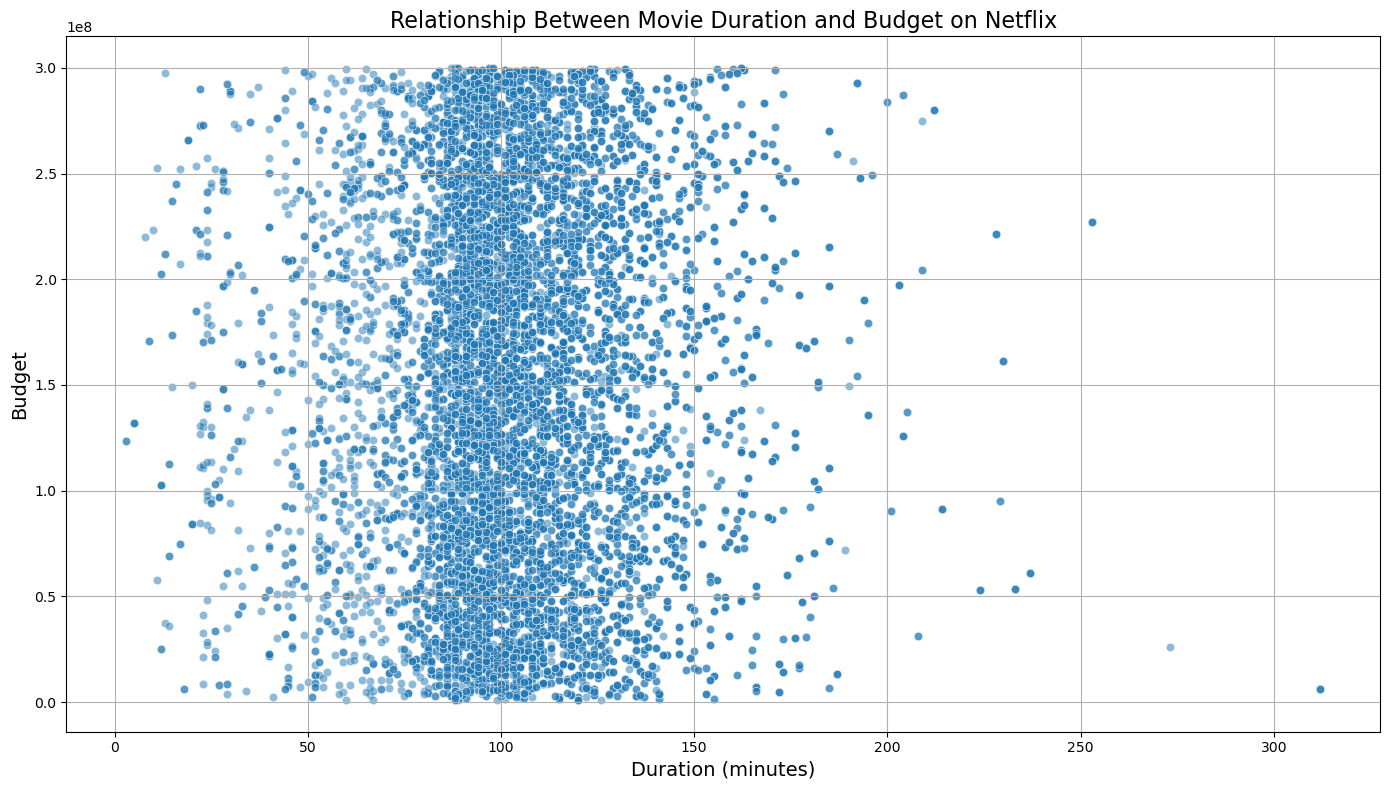

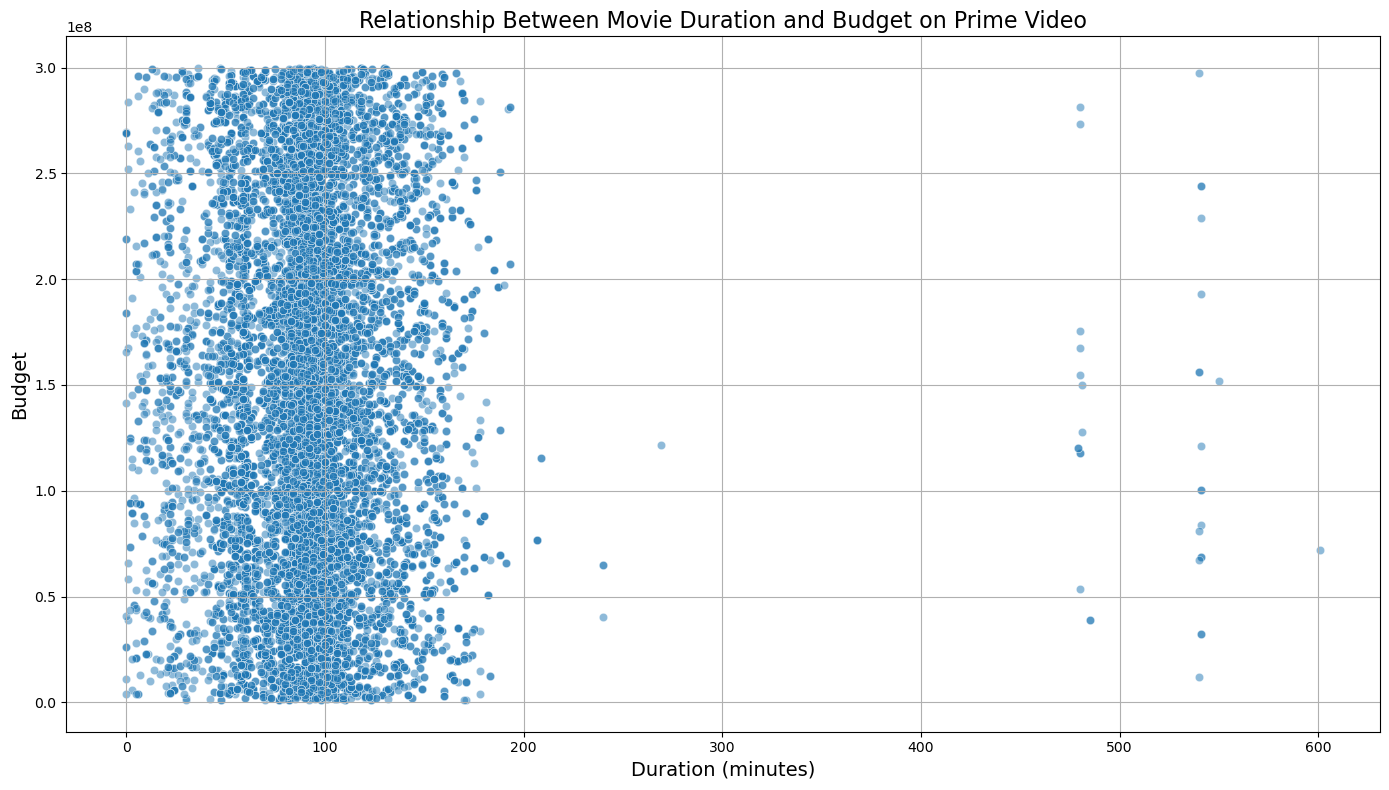

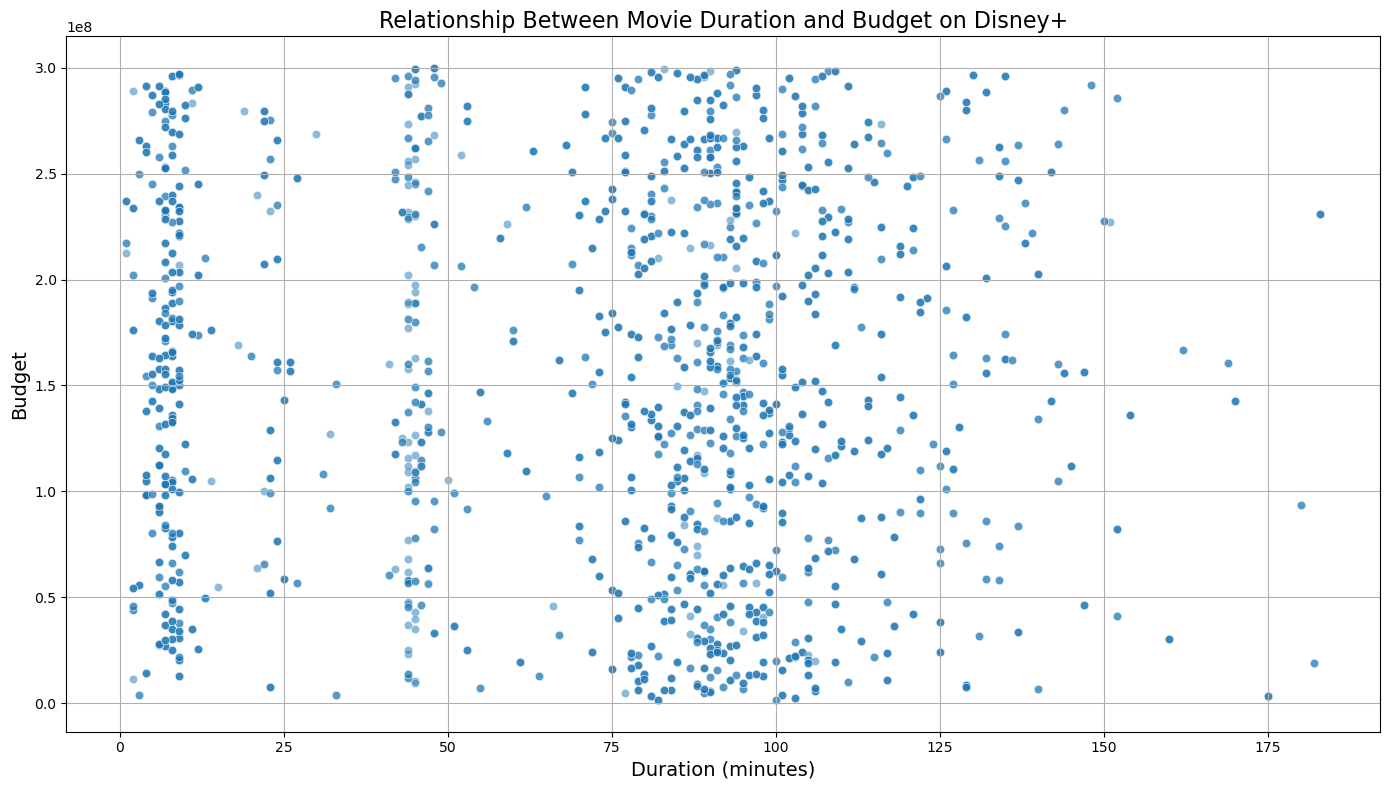

In [10]:
# Function to create a scatter plot showing the relationship between movie duration and budget for a specific platform
def plot_duration_vs_budget_for_platform(df, platform_name):
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df, x='duration_min', y='budget', alpha=0.5)
    plt.title(f'Relationship Between Movie Duration and Budget on {platform_name}', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=14)
    plt.ylabel('Budget', fontsize=14)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
    plt.show()

# Assuming netflix_movies_df, prime_video_movies_df, disney_plus_movies_df are defined and include the necessary columns

# Create plots for each platform
plot_duration_vs_budget_for_platform(netflix_movies_df, 'Netflix')
plot_duration_vs_budget_for_platform(prime_video_movies_df, 'Prime Video')
plot_duration_vs_budget_for_platform(disney_plus_movies_df, 'Disney+')

## revenue per genre 

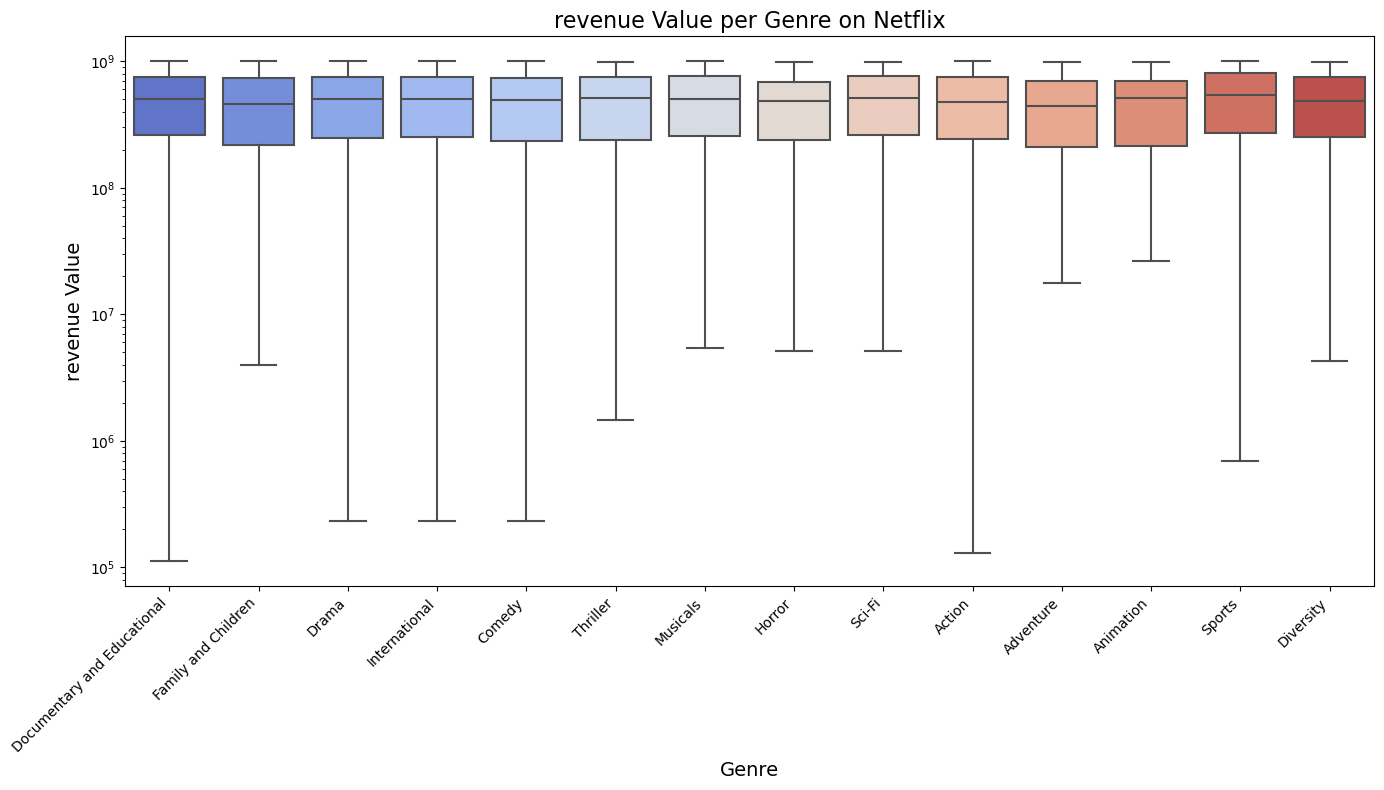

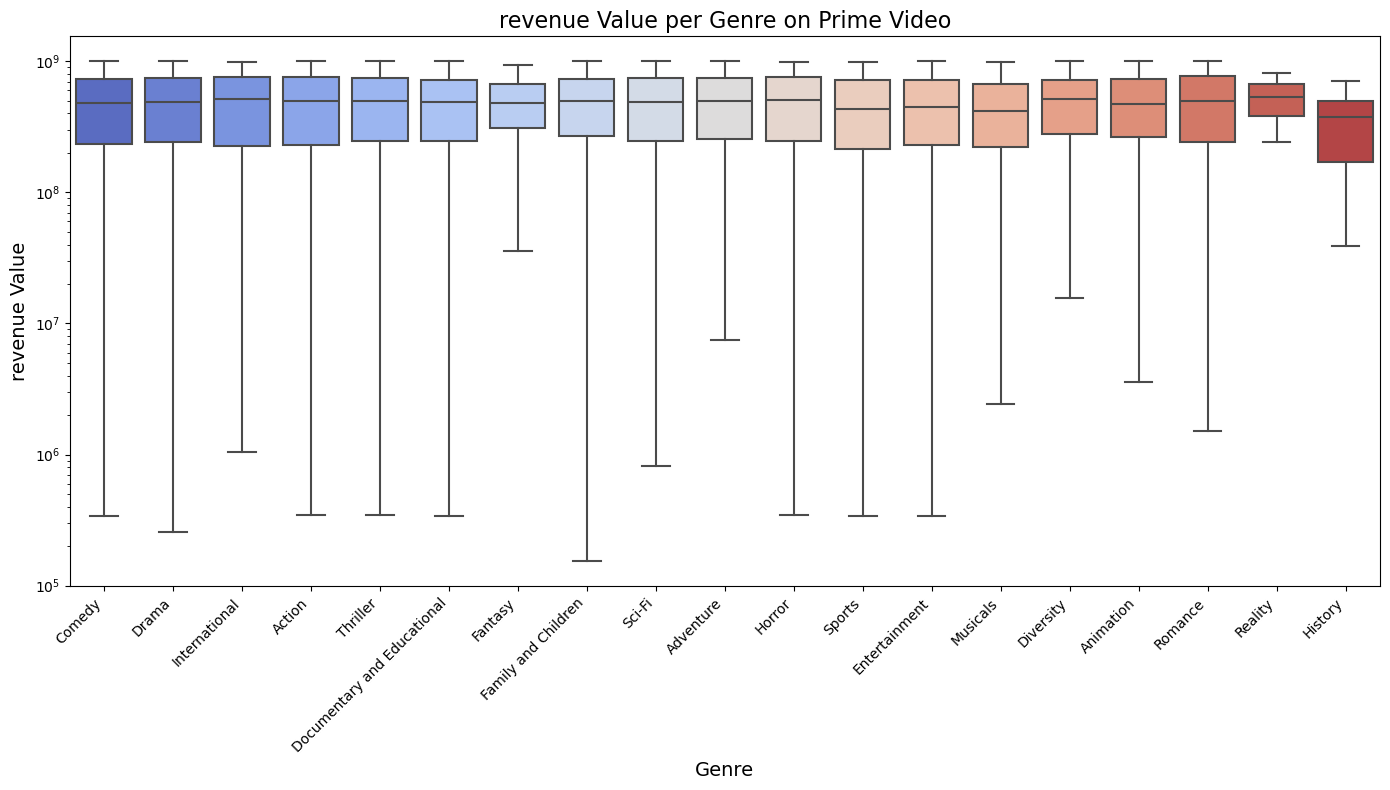

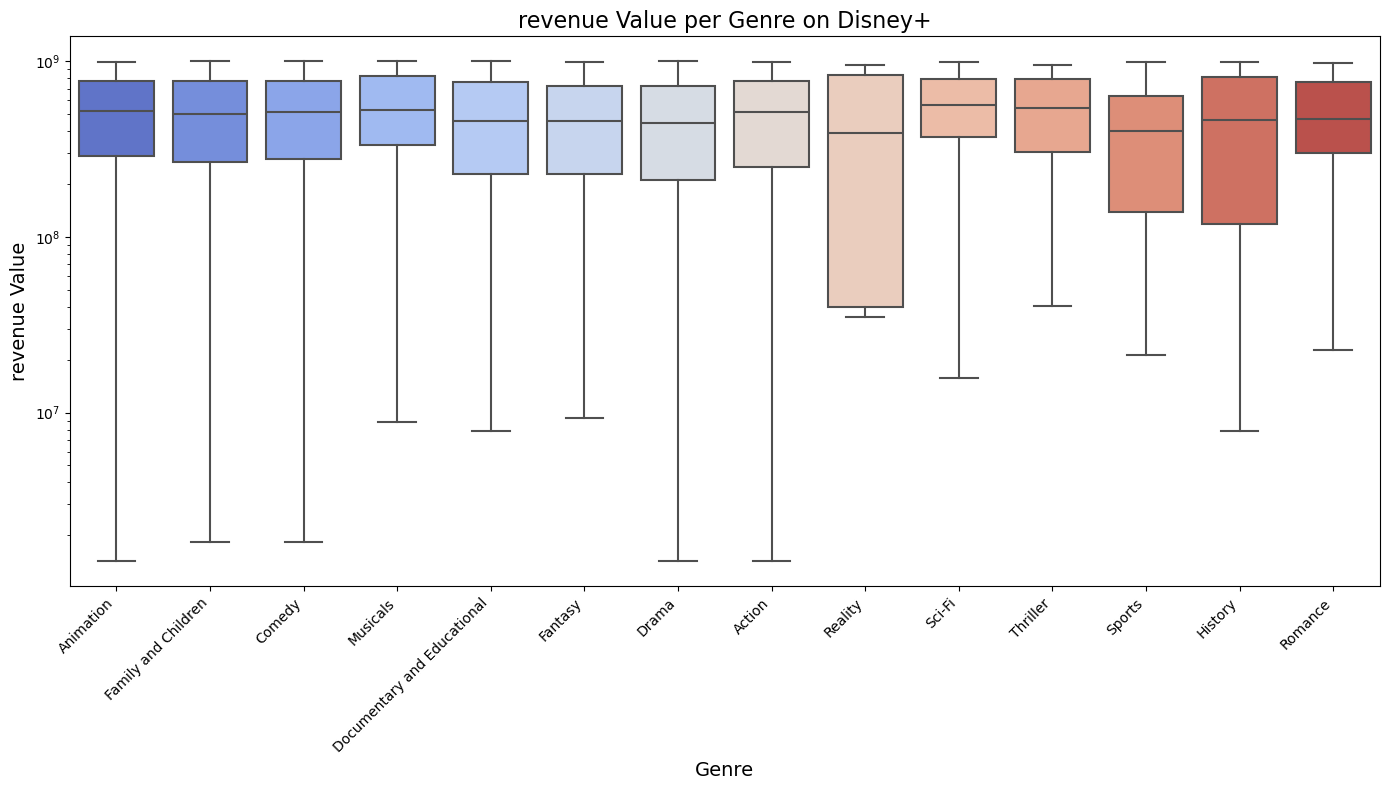

In [11]:
def plot_revenue_per_genre_for_platform(df, platform_name):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='genre', y='revenue', palette='coolwarm')
    plt.title(f'revenue Value per Genre on {platform_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('revenue Value', fontsize=14)
    plt.yscale('log')  # Use logarithmic scale if revenue values span several orders of magnitude
    plt.tight_layout()
    plt.show()

# Create plots for each platform
plot_revenue_per_genre_for_platform(netflix_movies_df, 'Netflix')
plot_revenue_per_genre_for_platform(prime_video_movies_df, 'Prime Video')
plot_revenue_per_genre_for_platform(disney_plus_movies_df, 'Disney+')

## Budget per genre

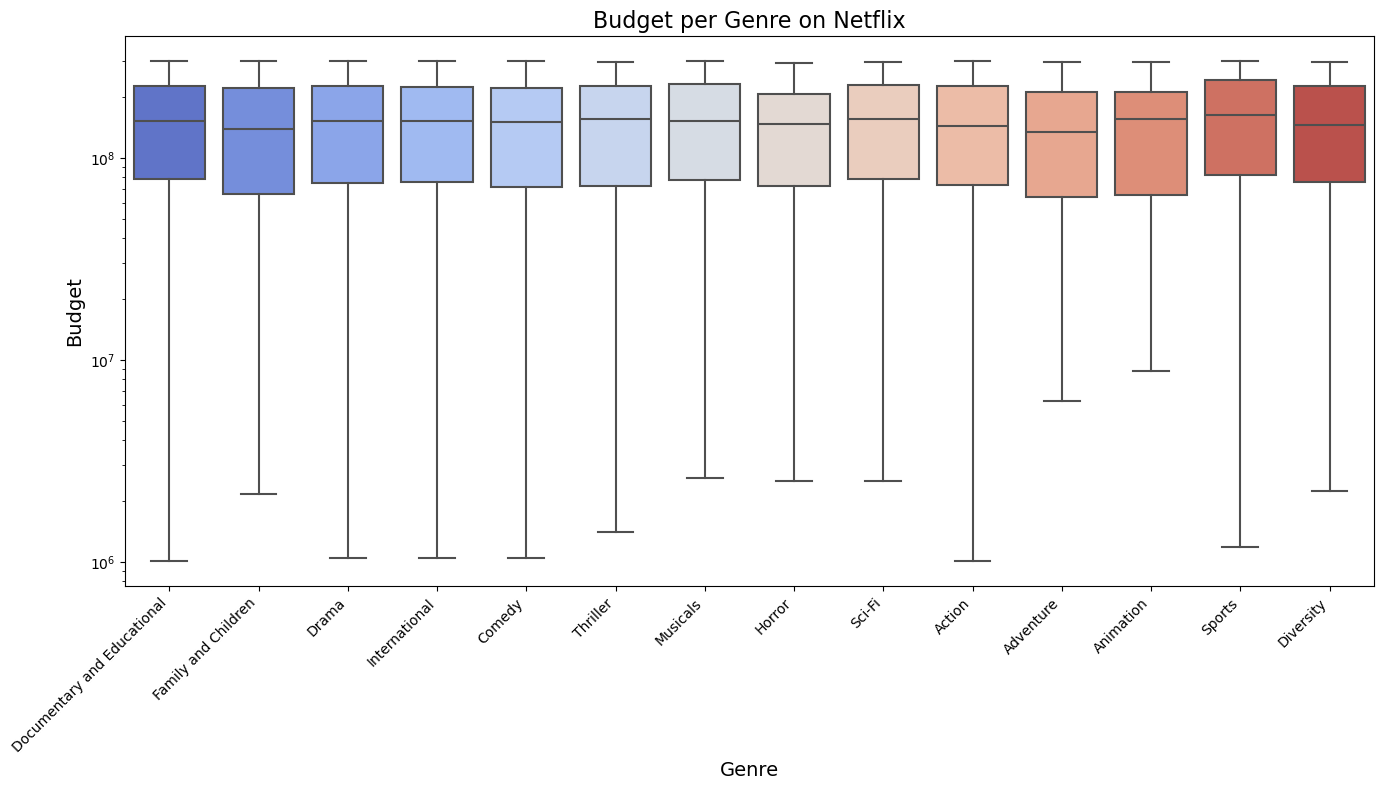

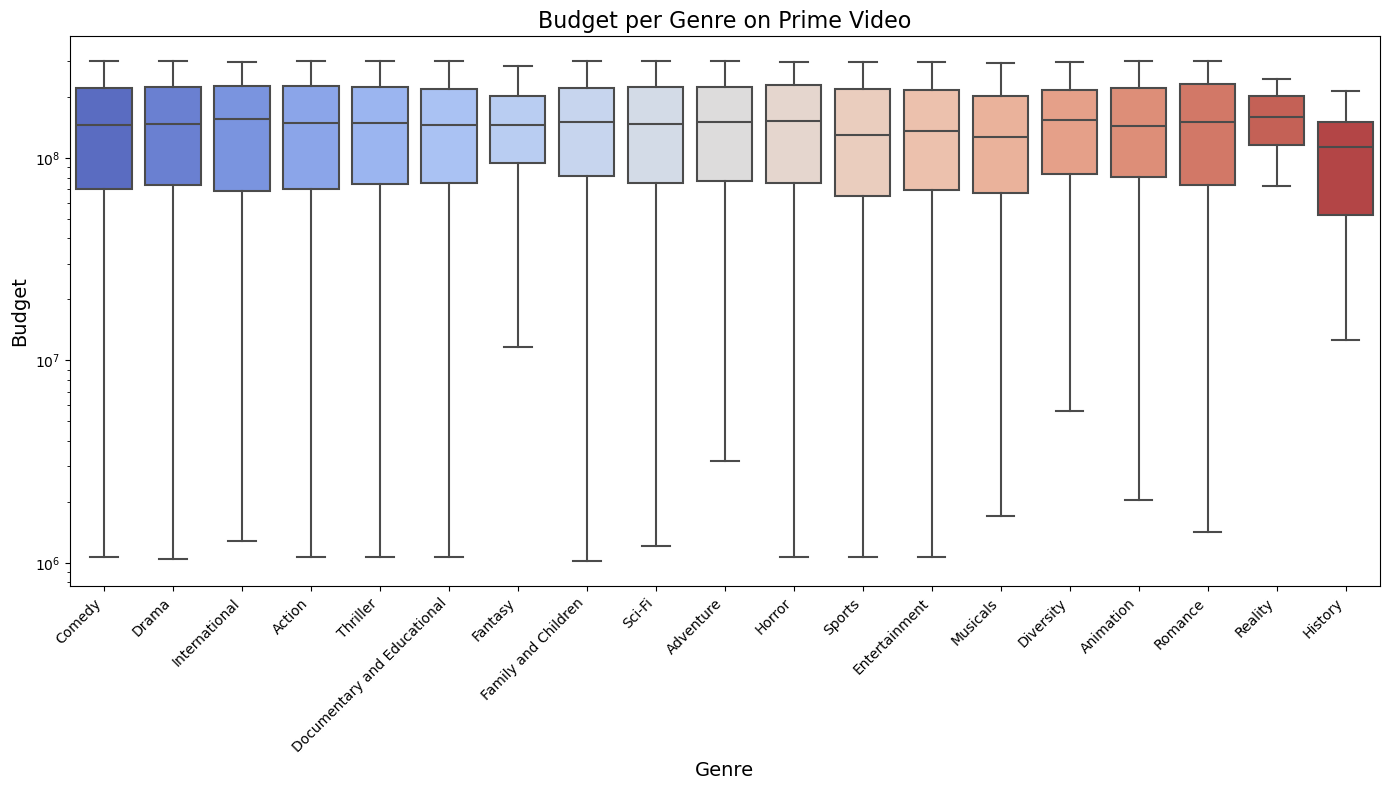

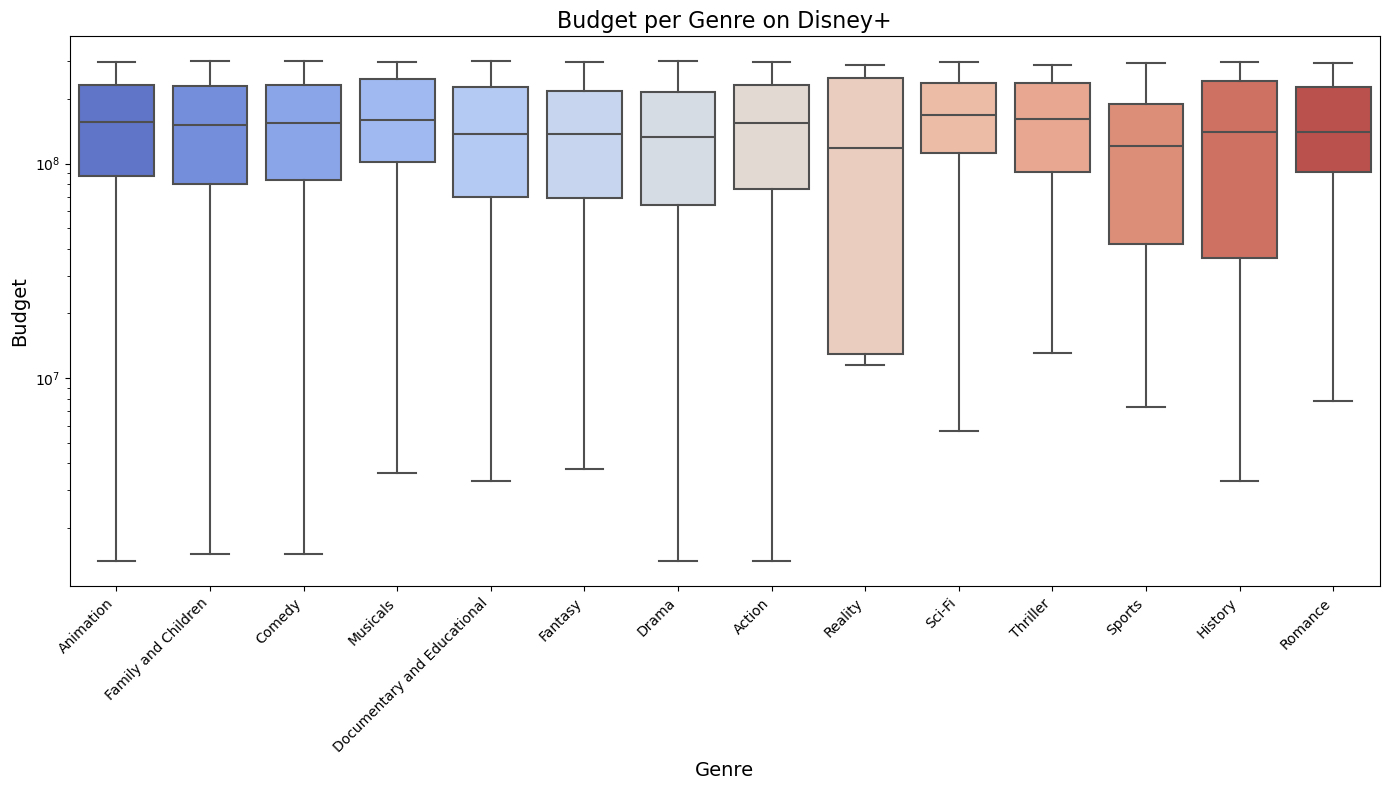

In [12]:
def plot_budget_per_genre_for_platform(df, platform_name):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='genre', y='budget', palette='coolwarm')
    plt.title(f'Budget per Genre on {platform_name}', fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Budget', fontsize=14)
    plt.yscale('log')  # Use logarithmic scale if budget values span several orders of magnitude
    plt.tight_layout()
    plt.show()

# Create plots for each platform
plot_budget_per_genre_for_platform(netflix_movies_df, 'Netflix')
plot_budget_per_genre_for_platform(prime_video_movies_df, 'Prime Video')
plot_budget_per_genre_for_platform(disney_plus_movies_df, 'Disney+')

## Revenue per platform

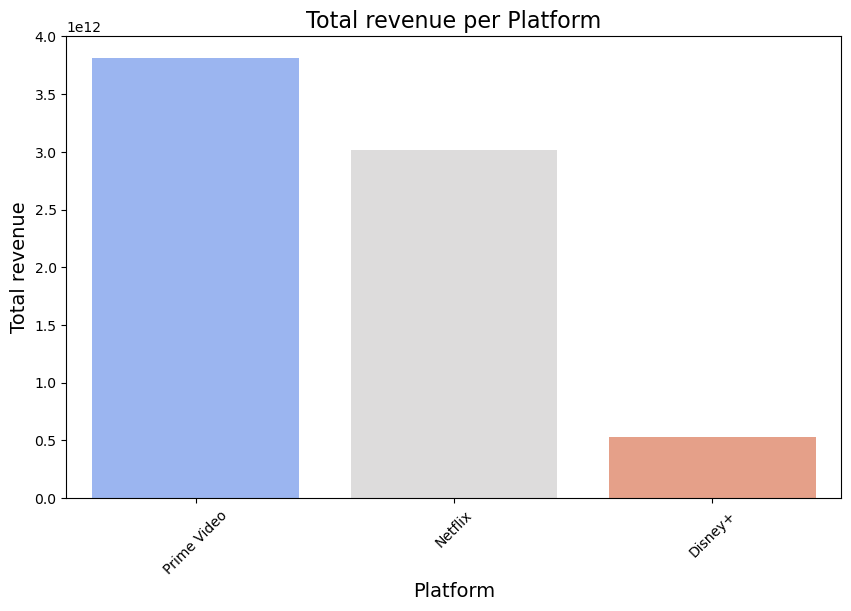

In [13]:
# Calculate the total revenue per platform
total_revenue_per_platform = movies_clean_df.groupby('platform')['revenue'].sum().reset_index()

# Sort platforms by total revenue for better visualization
total_revenue_per_platform = total_revenue_per_platform.sort_values('revenue', ascending=False)

# Create a bar plot for total revenue per platform
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_per_platform, x='platform', y='revenue', palette='coolwarm')
plt.title('Total revenue per Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total revenue', fontsize=14)
plt.xticks(rotation=45)  # Rotate platform names for better readability
plt.show()

## Budget per platform

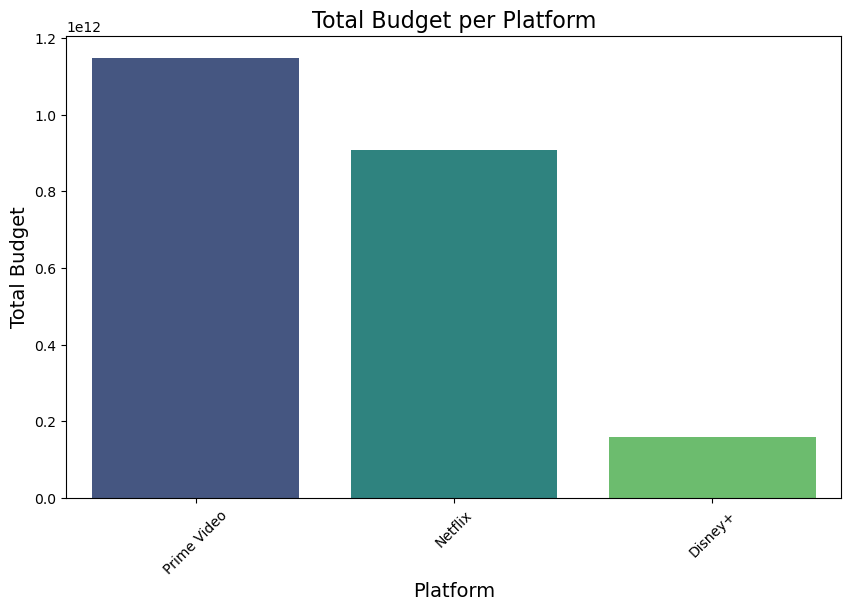

In [14]:
# Calculate the total budget per platform
total_budget_per_platform = movies_clean_df.groupby('platform')['budget'].sum().reset_index()

# Sort platforms by total budget for a clearer visualization
total_budget_per_platform = total_budget_per_platform.sort_values('budget', ascending=False)

# Create a bar plot for total budget per platform
plt.figure(figsize=(10, 6))
sns.barplot(data=total_budget_per_platform, x='platform', y='budget', palette='viridis')
plt.title('Total Budget per Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Budget', fontsize=14)
plt.xticks(rotation=45)  # Rotate platform names for better readability
plt.show()

## Application GUI Prototype

In [15]:
def center_window(win):
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

def display_logo():
    logo_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/images/cinemalytics_nobackground.png'
    img = Image.open(logo_path)
    img = img.resize((100, 100), Image.Resampling.LANCZOS)
    logo_image = ImageTk.PhotoImage(img)
    logo_label = Label(app, image=logo_image)
    logo_label.image = logo_image
    logo_label.pack(pady=20)

def show_recommendation():
    clear_window()
    display_logo()
    tk.Label(app, text="Based on your criteria, we would recommend:", pady=10).pack(expand=True)
    for i in range(1, 4):
        tk.Label(app, text=f"{i}. Platform").pack()
    tk.Button(app, text="Back to Start page", command=welcome_window, padx=20, pady=10).pack(side=tk.LEFT, padx=(100, 10), pady=(10, 20))
    tk.Button(app, text="Close", command=app.destroy, padx=20, pady=10).pack(side=tk.RIGHT, padx=(10, 100), pady=(10, 20))

def input_window(content_type):
    clear_window()
    display_logo()
    tk.Label(app, text=content_type, pady=10).pack()
    tk.Label(app, text="Genre").pack()
    global genre_entry
    genre_entry = tk.Entry(app)
    genre_entry.pack()
    length_label_text = "Movie length (minutes)" if content_type == "Movies" else "Seasons"
    tk.Label(app, text=length_label_text).pack()
    global length_entry
    length_entry = tk.Entry(app)
    length_entry.pack()
    tk.Label(app, text="Rating (e.g., PG, PG-13)").pack()
    global rating_entry
    rating_entry = tk.Entry(app)
    rating_entry.pack()
    tk.Button(app, text="Enter", command=show_recommendation).pack(pady=20)

def content_selection_window():
    clear_window()
    display_logo()
    tk.Button(app, text="Movie?", command=lambda: input_window("Movies"), padx=20, pady=10).pack(pady=10)
    tk.Button(app, text="TV Show?", command=lambda: input_window("TV Shows"), padx=20, pady=10).pack(pady=10)

def welcome_window():
    clear_window()
    display_logo()
    tk.Label(app, text="Welcome to Cinemalytics!", pady=10).pack()
    tk.Button(app, text="Start", command=content_selection_window, padx=20, pady=10).pack()
    tk.Label(app, text="© 2024 Cinemalytics, Inc.", pady=10).pack(side=tk.BOTTOM)

def clear_window():
    for widget in app.winfo_children():
        widget.destroy()

def on_close():
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        app.destroy()

app = tk.Tk()
app.title("Cinemalytics - Platform Recommender")
app.geometry('400x400')
center_window(app)

app.protocol("WM_DELETE_WINDOW", on_close)  # Handle the window close event

welcome_window()
app.mainloop()


: 